In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [2]:
#Read in cleased data file
file_5 = "all.csv"
when_df = pd.read_csv(file_5, low_memory=False)

when_df.head()

,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,2010-01-11,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,2010-01-11,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,2010-01-04,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No


In [3]:
#Read in cleased data file
file_6 = "time_bin.csv"
time_df = pd.read_csv(file_6)

time_df.head()

,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f,Time_Bin
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7,Morning Commute
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18,Evening Commute
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20,Late PM


In [19]:
#read in data file

traffic_vol_df = pd.read_csv("traffic_vol_2010_to2016.csv")

#traffic_vol_df = traffic_vol_df.set_index("Year")

traffic_vol_df

,Year,Cars and Taxis,Light Commercial\nVehicles 1,Heavy Goods Vehicles 2,Motorcycles,Buses & Coaches,All motor vehicles
0,2010,241.9,41.4,16.4,2.9,3.2,305.8
1,2011,244.3,42.0,16.0,2.9,3.0,308.2
2,2012,245.5,42.2,15.6,2.9,2.8,309.0
3,2013,246.6,43.8,15.8,2.8,2.9,311.9
4,2014,253.5,46.6,16.2,2.9,2.9,322.2
5,2015,258.1,48.9,16.8,2.9,2.8,329.6
6,2016,263.9,51.7,17.0,3.0,2.6,338.2


   Year  Cars and Taxis  Light Commercial\nVehicles 1  Heavy Goods Vehicles 2  \
6  2016           263.9                          51.7                    17.0   
5  2015           258.1                          48.9                    16.8   
4  2014           253.5                          46.6                    16.2   
3  2013           246.6                          43.8                    15.8   
2  2012           245.5                          42.2                    15.6   
1  2011           244.3                          42.0                    16.0   
0  2010           241.9                          41.4                    16.4   

   Motorcycles  Buses & Coaches  All motor vehicles  
6          3.0              2.6           15.200683  
5          2.9              2.8           14.814149  
4          2.9              2.9           14.481550  
3          2.8              2.9           14.018608  
2          2.9              2.8           13.888265  
1          2.9             

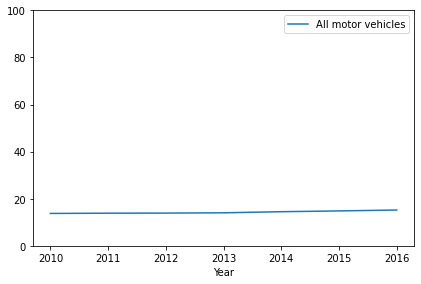

In [22]:
total_all_years = traffic_vol_df["All motor vehicles"].sum()
traffic_vol_df["All motor vehicles"] = (traffic_vol_df["All motor vehicles"] / total_all_years)*100
sorted_traffic_vol_df = traffic_vol_df.sort_values("Year", ascending=False)
sorted_traffic_vol_df.plot.line(x="Year", y="All motor vehicles", linestyle="-")
plt.tight_layout()
plt.ylim(0,100)
print(sorted_traffic_vol_df)

<Figure size 432x288 with 0 Axes>

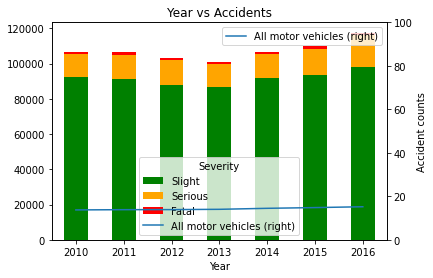

In [34]:
accident_sev_yr = time_df.groupby(['Year','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_yr.sort_values(by=['Fatal','Serious','Slight'], ascending=False)
sorted_df=sorted_df.sort_values(by=['Year'], ascending=True)
sorted_df=sorted_df[["Slight","Serious","Fatal","Year"]]

plt.figure()
ax = sorted_df.plot.bar(x="Year", stacked=True, color={"Slight":"green","Serious":"orange","Fatal":"red"})
ax2 = traffic_vol_df[["All motor vehicles"]].plot(kind="line", y="All motor vehicles", linestyle="-", secondary_y=True, ax=ax)
ax2.set_ylim(0,100)
plt.title('Year vs Accidents')
plt.xlabel("Year")
plt.ylabel("Accident counts")
plt.legend(loc="best")

plt.show()